In [54]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,Dense,MaxPool2D,Flatten,BatchNormalization,Dropout
from keras.preprocessing import image
import matplotlib.pyplot as plt
import cv2
from keras.utils.vis_utils import plot_model

In [4]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/


In [6]:
!kaggle datasets download -d phucthaiv02/flower-image-dataset

 99% 1.37G/1.38G [00:18<00:00, 71.9MB/s]
100% 1.38G/1.38G [00:18<00:00, 80.0MB/s]


In [8]:
import zipfile
zip_ref = zipfile.ZipFile('/content/flower-image-dataset.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [9]:
training_data = keras.utils.image_dataset_from_directory(
    directory = '/content/flower-image/train',
    labels= 'inferred',
    label_mode= 'int',
    batch_size= 32,
    image_size=(256,256)
)

Found 45492 files belonging to 104 classes.


In [11]:
validation_data = keras.utils.image_dataset_from_directory(
    directory = '/content/flower-image/val',
    labels= 'inferred',
    label_mode= 'int',
    batch_size= 32,
    image_size=(256,256)
)

Found 12157 files belonging to 104 classes.


In [13]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label
training_data = training_data.map(process)
validation_data= validation_data.map(process)

In [24]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape = (256,256,3))),
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu')),
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu')),
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.01))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.01))
model.add(Dense(104,activation='softmax'))

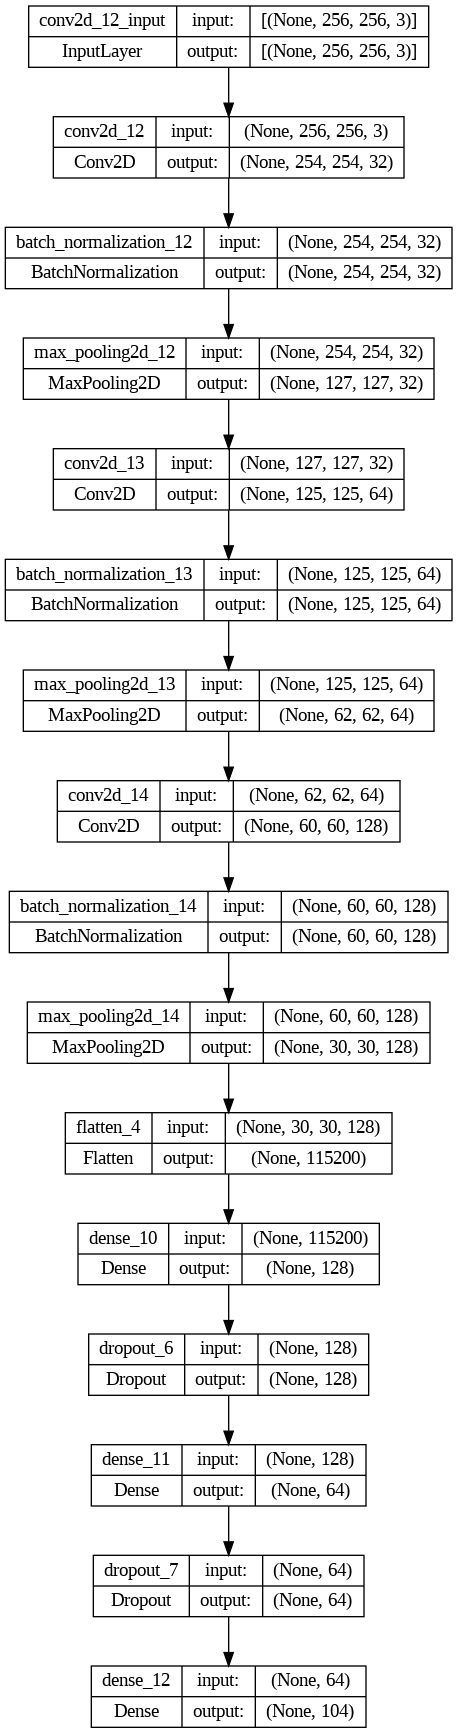

In [55]:
plot_model(model,show_shapes=True,show_layer_names=True)

In [29]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [31]:
history = model.fit(training_data,validation_data=validation_data,epochs=10)

Epoch 1/10
1422/1422 [==============================] - 152s 106ms/step - loss: 4.1811 - accuracy: 0.0883 - val_loss: 3.7301 - val_accuracy: 0.1261
Epoch 2/10
1422/1422 [==============================] - 170s 119ms/step - loss: 3.5314 - accuracy: 0.1434 - val_loss: 3.7476 - val_accuracy: 0.1370
Epoch 3/10
1422/1422 [==============================] - 175s 123ms/step - loss: 3.2057 - accuracy: 0.2007 - val_loss: 3.5989 - val_accuracy: 0.1588
Epoch 4/10
1422/1422 [==============================] - 149s 105ms/step - loss: 2.8587 - accuracy: 0.2609 - val_loss: 4.0484 - val_accuracy: 0.1755
Epoch 5/10
1422/1422 [==============================] - 149s 105ms/step - loss: 2.5428 - accuracy: 0.3304 - val_loss: 3.9363 - val_accuracy: 0.1797
Epoch 6/10
1422/1422 [==============================] - 150s 106ms/step - loss: 2.2535 - accuracy: 0.3927 - val_loss: 4.4153 - val_accuracy: 0.1803
Epoch 7/10
1422/1422 [==============================] - 150s 105ms/step - loss: 2.0642 - accuracy: 0.4387 - val_

<function matplotlib.pyplot.show(close=None, block=None)>

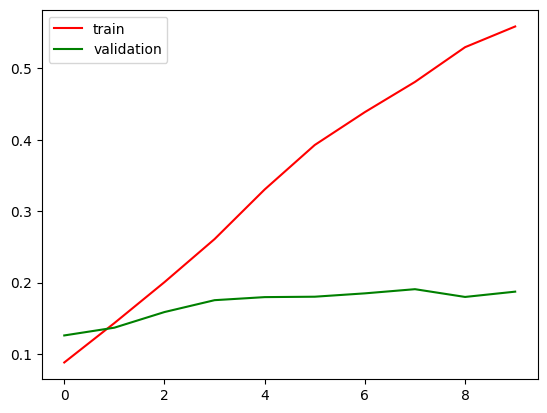

In [32]:
plt.plot(history.history['accuracy'],color = 'red',label = 'train')
plt.plot(history.history['val_accuracy'],color = 'green',label = 'validation')
plt.legend()
plt.show